<a href="https://colab.research.google.com/github/thedrads/telecomx-churn-analysis/blob/main/analise_churn_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # 📊 TelecomX - Análise de Evasão de Clientes
## Challenge Data Science | Alura + Oracle Next Education (ONE)

---

**👤 Autor:** Fábio Andrade  
**📅 Data:** 22 de Dezembro de 2024  
**🔗 Repositório:** [GitHub - telecomx-churn-analysis](https://github.com/thedrads/telecomx-churn-analysis)  
**🎯 Objetivo:** Análise completa de Churn usando processo ETL

---

### 📌 Sobre este Projeto

Este notebook documenta a análise de dados de evasão de clientes (churn) da empresa **TelecomX**, desenvolvido como parte do Challenge de Data Science.

**Etapas do projeto:**
1. 📥 **Extract** - Extração de dados via API REST
2. 🔧 **Transform** - Limpeza e transformação dos dados
3. 💾 **Load** - Carga dos dados tratados
4. 📊 **EDA** - Análise Exploratória de Dados
5. 💡 **Insights** - Recomendações estratégicas

---

## 🏢 1. CONTEXTO DO NEGÓCIO

### 📉 O Problema: Evasão de Clientes (Churn)

A **TelecomX** é uma empresa de telecomunicações que enfrenta um desafio crítico para sua sustentabilidade: **alto índice de cancelamento de contratos** por parte dos clientes.

#### 🎯 O que é Churn?

**Churn** (ou evasão) refere-se ao cancelamento de serviços por parte do cliente. Na indústria de telecomunicações, isso significa:
- ❌ Cliente cancela contrato
- ❌ Para de pagar pelos serviços
- ❌ Migra para concorrência ou abandona o serviço

#### 💰 Impacto no Negócio

| Aspecto | Impacto |
|---------|---------|
| **Receita** | Perda de receita recorrente mensal (MRR) |
| **Custos** | CAC (Custo de Aquisição) é 5-7x maior que retenção |
| **Reputação** | Sinal negativo para investidores e mercado |
| **Crescimento** | Limita expansão e escalabilidade |

> **💡 Estatística chave:** Reter um cliente existente custa até 7 vezes menos do que adquirir um novo cliente.

---

### 🎯 Objetivos do Projeto

Como **Assistente de Análise de Dados** na equipe de Data Science da TelecomX, fui designado para:

#### ✅ Objetivos Principais

1. **Extrair** dados de clientes do sistema da empresa (via API REST)
2. **Limpar e transformar** dados brutos em formato análise-ready
3. **Identificar padrões** que diferenciam clientes que cancelam vs. que permanecem
4. **Gerar insights acionáveis** para áreas de negócio (Marketing, Retenção, Produto)
5. **Preparar base** para futuros modelos preditivos de Machine Learning

#### 📊 Perguntas de Negócio a Responder

- ❓ Qual o perfil demográfico dos clientes que mais cancelam?
- ❓ Quais serviços estão associados a maior/menor churn?
- ❓ Tipo de contrato influencia na retenção?
- ❓ Clientes de longa data cancelam menos?
- ❓ Qual o impacto financeiro do churn atual?

---

### 📚 Metodologia: Processo ETL

Este projeto segue o framework **ETL (Extract, Transform, Load)**, padrão da indústria para pipelines de dados:
```
┌─────────────┐      ┌─────────────┐      ┌─────────────┐
│   EXTRACT   │ ───> │  TRANSFORM  │ ───> │    LOAD     │
│             │      │             │      │             │
│ • API REST  │      │ • Limpeza   │      │ • CSV       │
│ • JSON      │      │ • Validação │      │ • Análise   │
│ • 7k+ linhas│      │ • Conversão │      │ • Dashboard │
└─────────────┘      └─────────────┘      └─────────────┘
```

**Ferramentas utilizadas:**
- 🐍 Python 3.x
- 🐼 Pandas (manipulação de dados)
- 📊 Matplotlib/Seaborn/Plotly (visualização)
- 🔢 NumPy (operações numéricas)

---

## 📖 2. DICIONÁRIO DE DADOS

A equipe técnica da TelecomX forneceu a especificação completa da estrutura de dados disponível na API.

### 📋 Estrutura do Dataset

**Total esperado:** 21 variáveis (colunas) organizadas em 5 categorias

---

#### 🆔 **IDENTIFICAÇÃO**

| Coluna | Descrição | Tipo | Valores Possíveis |
|--------|-----------|------|-------------------|
| `customerID` | Identificador único do cliente | String | Ex: "7590-VHVEG" |

---

#### 🎯 **VARIÁVEL ALVO (Target)**

| Coluna | Descrição | Tipo | Valores Possíveis |
|--------|-----------|------|-------------------|
| `Churn` | Cliente cancelou o serviço? | String | `Yes`, `No` |

> **⚠️ IMPORTANTE:** Esta é a variável que queremos entender e prever.

---

#### 👥 **VARIÁVEIS DEMOGRÁFICAS**

| Coluna | Descrição | Tipo | Valores Possíveis |
|--------|-----------|------|-------------------|
| `gender` | Gênero do cliente | String | `Male`, `Female` |
| `SeniorCitizen` | Cliente é idoso (65+ anos)? | Integer | `0` (Não), `1` (Sim) |
| `Partner` | Tem parceiro(a)? | String | `Yes`, `No` |
| `Dependents` | Tem dependentes (filhos/família)? | String | `Yes`, `No` |

---

#### 📞 **SERVIÇOS CONTRATADOS**

**Serviço Telefônico:**

| Coluna | Descrição | Tipo | Valores Possíveis |
|--------|-----------|------|-------------------|
| `PhoneService` | Possui serviço telefônico? | String | `Yes`, `No` |
| `MultipleLines` | Possui múltiplas linhas? | String | `Yes`, `No`, `No phone service` |

**Serviço de Internet:**

| Coluna | Descrição | Tipo | Valores Possíveis |
|--------|-----------|------|-------------------|
| `InternetService` | Tipo de internet contratada | String | `DSL`, `Fiber optic`, `No` |
| `OnlineSecurity` | Serviço adicional de segurança online | String | `Yes`, `No`, `No internet service` |
| `OnlineBackup` | Serviço adicional de backup online | String | `Yes`, `No`, `No internet service` |
| `DeviceProtection` | Proteção de dispositivo | String | `Yes`, `No`, `No internet service` |
| `TechSupport` | Suporte técnico premium | String | `Yes`, `No`, `No internet service` |
| `StreamingTV` | Streaming de TV | String | `Yes`, `No`, `No internet service` |
| `StreamingMovies` | Streaming de filmes | String | `Yes`, `No`, `No internet service` |

---

#### 💰 **INFORMAÇÕES DE CONTA/FINANCEIRO**

| Coluna | Descrição | Tipo | Valores Possíveis |
|--------|-----------|------|-------------------|
| `tenure` | Meses como cliente da empresa | Integer | 0 a 72+ |
| `Contract` | Tipo de contrato | String | `Month-to-month`, `One year`, `Two year` |
| `PaperlessBilling` | Usa fatura digital (sem papel)? | String | `Yes`, `No` |
| `PaymentMethod` | Método de pagamento | String | `Electronic check`, `Mailed check`, `Bank transfer (automatic)`, `Credit card (automatic)` |
| `MonthlyCharges` | Valor cobrado mensalmente (USD) | Float | 18.00 a 120.00 |
| `TotalCharges` | Total acumulado pago pelo cliente (USD) | Float | Variável (depende de tenure) |

---

### 🔧 Observações Técnicas da API

#### ⚠️ Estrutura JSON Aninhada

Conforme documentação técnica fornecida, os dados na API estão organizados em **formato hierárquico (nested JSON)**:
```json
{
  "customerID": "7590-VHVEG",
  "Churn": "No",
  "customer": {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1
  },
  "phone": {
    "PhoneService": "No",
    "MultipleLines": "No phone service"
  },
  "internet": {
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No"
  },
  "account": {
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "Charges": {
      "Monthly": 29.85,
      "Total": 29.85
    }
  }
}
```

**📌 Ação necessária no ETL:**  
Usar `pd.json_normalize()` para "achatar" a estrutura hierárquica em formato tabular (linhas × colunas).

---

### ✅ Critérios de Qualidade Esperados

Após o processo de ETL, o dataset final deve atender:

| Critério | Meta |
|----------|------|
| **Total de colunas** | 21 colunas |
| **Valores nulos** | 0 ou tratados adequadamente |
| **Duplicados** | 0 registros duplicados |
| **Tipos de dados** | Corretos (int, float, string) |
| **Categorias** | Valores padronizados (sem typos/variações) |
| **Registros** | ~7.000 clientes |

---

In [53]:
# ====================================================================
# 📦 INSTALAÇÃO DE DEPENDÊNCIAS
# ====================================================================
# O Google Colab já vem com Pandas, NumPy, Matplotlib e Seaborn.
# Precisamos instalar apenas o Plotly para gráficos interativos.
#
# Comandos:
# - ! = executa comando do terminal dentro do notebook
# - pip = gerenciador de pacotes Python
# - -q = quiet (modo silencioso, menos mensagens)
# - --upgrade = atualiza se já estiver instalado
# ====================================================================

print("🔄 Atualizando pip (gerenciador de pacotes)...")
!pip install -q --upgrade pip

print("\n📦 Instalando bibliotecas necessárias...")
!pip install -q plotly==5.18.0

print("\n" + "="*60)
print("✅ INSTALAÇÃO CONCLUÍDA COM SUCESSO!")
print("="*60)
print("\n📌 Bibliotecas instaladas:")
print("   • Plotly 5.18.0 (gráficos interativos)")
print("\n📌 Bibliotecas nativas do Colab (já disponíveis):")
print("   • Pandas (manipulação de dados)")
print("   • NumPy (operações numéricas)")
print("   • Matplotlib (visualização estática)")
print("   • Seaborn (visualização estatística)")
print("   • Requests (requisições HTTP)")
print("\n🎯 Próximo passo: Importar bibliotecas")

🔄 Atualizando pip (gerenciador de pacotes)...

📦 Instalando bibliotecas necessárias...

✅ INSTALAÇÃO CONCLUÍDA COM SUCESSO!

📌 Bibliotecas instaladas:
   • Plotly 5.18.0 (gráficos interativos)

📌 Bibliotecas nativas do Colab (já disponíveis):
   • Pandas (manipulação de dados)
   • NumPy (operações numéricas)
   • Matplotlib (visualização estática)
   • Seaborn (visualização estatística)
   • Requests (requisições HTTP)

🎯 Próximo passo: Importar bibliotecas


In [54]:
# ====================================================================
# 📚 IMPORTAÇÃO DE BIBLIOTECAS
# ====================================================================
# Organizamos as importações por categoria para facilitar leitura.
# Cada biblioteca tem uma função específica no processo ETL.
# ====================================================================

# --- 1. MANIPULAÇÃO DE DADOS ---
import pandas as pd              # Trabalha com DataFrames (tabelas)
import numpy as np               # Operações matemáticas e arrays

# --- 2. REQUISIÇÕES HTTP (API) ---
import requests                  # Faz chamadas à API REST
import json                      # Manipula arquivos/strings JSON

# --- 3. VISUALIZAÇÃO DE DADOS ---
import matplotlib.pyplot as plt  # Gráficos estáticos básicos
import seaborn as sns            # Gráficos estatísticos elegantes
import plotly.express as px      # Gráficos interativos (sintaxe rápida)
import plotly.graph_objects as go # Gráficos interativos (controle total)

# --- 4. UTILITÁRIOS ---
from datetime import datetime    # Manipulação de datas/horas
import warnings                  # Controle de avisos/warnings

# ====================================================================
# 🎨 CONFIGURAÇÕES GLOBAIS DE VISUALIZAÇÃO
# ====================================================================

# Ocultar avisos não críticos (deixa output mais limpo)
warnings.filterwarnings('ignore')

# Configurações de exibição do Pandas
pd.set_option('display.max_columns', None)   # Mostrar todas as colunas
pd.set_option('display.max_rows', 100)       # Mostrar até 100 linhas
pd.set_option('display.float_format', '{:.2f}'.format)  # 2 casas decimais

# Configurações de estilo Seaborn
sns.set_style("whitegrid")                   # Fundo branco com grade
sns.set_palette("Set2")                      # Paleta de cores padrão

# Configurações de tamanho padrão de gráficos Matplotlib
plt.rcParams['figure.figsize'] = (12, 6)     # Largura x Altura em polegadas
plt.rcParams['font.size'] = 10               # Tamanho da fonte

# ====================================================================
# 🎨 PALETA DE CORES PROFISSIONAL DO PROJETO
# ====================================================================
# Definindo cores consistentes para todo o projeto
# Baseado em paleta Corporate Professional + acessibilidade
# ====================================================================

COLORS = {
    # Cores principais
    'primary': '#2E86AB',      # Azul corporativo
    'secondary': '#A23B72',    # Roxo elegante
    'accent': '#F18F01',       # Laranja destaque

    # Cores de status
    'success': '#06A77D',      # Verde sucesso
    'danger': '#D81159',       # Vermelho perigo/alerta
    'warning': '#F18F01',      # Laranja aviso
    'info': '#2E86AB',         # Azul informação
    'neutral': '#6C757D',      # Cinza neutro

    # Cores específicas do projeto
    'churn_yes': '#E63946',    # Vermelho para Churn = Yes
    'churn_no': '#06FFA5',     # Verde claro para Churn = No

    # Paleta categórica (para múltiplas categorias)
    'palette': ['#2E86AB', '#A23B72', '#F18F01', '#06A77D',
                '#D81159', '#6C757D', '#E63946', '#06FFA5']
}

# ====================================================================
# ✅ VALIDAÇÃO DAS IMPORTAÇÕES
# ====================================================================

print("="*60)
print("✅ BIBLIOTECAS IMPORTADAS COM SUCESSO!")
print("="*60)

print("\n📊 Versões instaladas:")
print(f"   • Pandas: {pd.__version__}")
print(f"   • NumPy: {np.__version__}")
print(f"   • Matplotlib: {plt.matplotlib.__version__}")
print(f"   • Seaborn: {sns.__version__}")

print("\n🎨 Configurações aplicadas:")
print("   ✓ Avisos silenciados")
print("   ✓ Display: todas colunas, até 100 linhas")
print("   ✓ Números: 2 casas decimais")
print("   ✓ Gráficos: 12×6 polegadas")
print("   ✓ Estilo: whitegrid")
print("   ✓ Paleta de cores: definida")

print("\n" + "="*60)
print("🎯 AMBIENTE CONFIGURADO E PRONTO PARA ETL!")
print("="*60)
print("\n📌 Próximo passo: Extração de dados da API")

✅ BIBLIOTECAS IMPORTADAS COM SUCESSO!

📊 Versões instaladas:
   • Pandas: 2.2.2
   • NumPy: 2.0.2
   • Matplotlib: 3.10.0
   • Seaborn: 0.13.2

🎨 Configurações aplicadas:
   ✓ Avisos silenciados
   ✓ Display: todas colunas, até 100 linhas
   ✓ Números: 2 casas decimais
   ✓ Gráficos: 12×6 polegadas
   ✓ Estilo: whitegrid
   ✓ Paleta de cores: definida

🎯 AMBIENTE CONFIGURADO E PRONTO PARA ETL!

📌 Próximo passo: Extração de dados da API


---

## 📥 3. EXTRAÇÃO DE DADOS (Extract)

### 🎯 Objetivo da Etapa

Conectar-se à API REST da TelecomX e extrair os dados brutos de clientes em formato JSON.

**Fonte de dados:**  
🌐 API URL: `https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json`

### ✅ Checklist de Validação da Extração

- [ ] Conexão com API bem-sucedida (status 200)
- [ ] JSON parseado sem erros
- [ ] DataFrame criado com estrutura aninhada (6 colunas)
- [ ] Aproximadamente 7.267 registros extraídos
- [ ] Nenhum erro de timeout ou falha de rede

### 🔧 Técnicas Utilizadas

- `requests.get()` - Requisição HTTP GET à API
- `response.json()` - Parse de string JSON para dict Python
- `pd.DataFrame()` - Conversão de lista de dicts para DataFrame
- `pd.json_normalize()` - "Achatamento" de estrutura hierárquica
- Tratamento de erros com try/except

---

In [55]:
# ====================================================================
# 🌐 FUNÇÃO DE EXTRAÇÃO DE DADOS DA API
# ====================================================================
# Desenvolvemos uma função reutilizável que:
# 1. Faz requisição HTTP GET à API
# 2. Valida status da resposta (200 = sucesso)
# 3. Faz parse do JSON retornado
# 4. Converte para DataFrame do Pandas
# 5. Retorna DataFrame ou None em caso de erro
#
# Benefícios de usar uma função:
# - Código organizado e reutilizável
# - Tratamento de erros centralizado
# - Fácil de testar e manter
# - Seguir boas práticas de engenharia de software
# ====================================================================

def extrair_dados_api(url, timeout=30):
    """
    Extrai dados de uma API REST e retorna como DataFrame.

    Parâmetros:
    -----------
    url : str
        URL completa da API REST
    timeout : int
        Tempo máximo de espera pela resposta (segundos)

    Retorna:
    --------
    pd.DataFrame ou None
        DataFrame com os dados extraídos, ou None se houver erro
    """

    try:
        print(f"🌐 Conectando à API...")
        print(f"   URL: {url}")

        # Fazer requisição GET com timeout
        response = requests.get(url, timeout=timeout)

        # Verificar status HTTP (200 = OK)
        if response.status_code == 200:
            print(f"   ✅ Status: {response.status_code} (OK)")

            # Parse do JSON
            print(f"📦 Parseando JSON...")
            dados_json = response.json()

            # Verificar se é uma lista
            if isinstance(dados_json, list):
                print(f"   ✅ Tipo: Lista com {len(dados_json):,} registros")
            else:
                print(f"   ⚠️ Tipo inesperado: {type(dados_json)}")
                return None

            # Converter para DataFrame
            print(f"🔄 Convertendo para DataFrame...")
            df = pd.DataFrame(dados_json)

            print(f"   ✅ DataFrame criado: {df.shape[0]:,} linhas × {df.shape[1]} colunas")

            return df

        else:
            print(f"   ❌ ERRO HTTP: Status {response.status_code}")
            print(f"   Mensagem: {response.text[:200]}")
            return None

    except requests.exceptions.Timeout:
        print(f"❌ ERRO: Timeout após {timeout} segundos")
        print(f"   A API não respondeu a tempo. Tente novamente.")
        return None

    except requests.exceptions.RequestException as e:
        print(f"❌ ERRO de Requisição: {str(e)}")
        return None

    except json.JSONDecodeError as e:
        print(f"❌ ERRO ao parsear JSON: {str(e)}")
        return None

    except Exception as e:
        print(f"❌ ERRO inesperado: {str(e)}")
        return None

print("="*60)
print("✅ FUNÇÃO extrair_dados_api() DEFINIDA COM SUCESSO!")
print("="*60)
print("\n📌 Próximo passo: Executar a extração")

✅ FUNÇÃO extrair_dados_api() DEFINIDA COM SUCESSO!

📌 Próximo passo: Executar a extração


In [56]:
# ====================================================================
# 🚀 EXECUTAR EXTRAÇÃO DE DADOS
# ====================================================================

print("="*60)
print("🚀 INICIANDO EXTRAÇÃO DE DADOS")
print("="*60)

# URL da API fornecida no desafio
API_URL = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

# Executar função de extração
df_raw = extrair_dados_api(API_URL)

# Validar resultado
print("\n" + "="*60)
if df_raw is not None:
    print("✅ EXTRAÇÃO BEM-SUCEDIDA!")
    print("="*60)

    print(f"\n📊 Dimensões do dataset bruto:")
    print(f"   • Registros (linhas): {df_raw.shape[0]:,}")
    print(f"   • Variáveis (colunas): {df_raw.shape[1]}")

    print(f"\n📋 Colunas extraídas:")
    for i, col in enumerate(df_raw.columns, 1):
        print(f"   {i}. {col}")

    print(f"\n🔍 Preview dos dados (primeiras 3 linhas):")
    print("="*60)
    display(df_raw.head(3))

    print(f"\n📦 Informações técnicas do DataFrame:")
    print("="*60)
    df_raw.info()

else:
    print("❌ FALHA NA EXTRAÇÃO!")
    print("="*60)
    print("⚠️ Verifique:")
    print("   1. Conexão com internet")
    print("   2. URL da API está correta")
    print("   3. API está disponível")

🚀 INICIANDO EXTRAÇÃO DE DADOS
🌐 Conectando à API...
   URL: https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json
   ✅ Status: 200 (OK)
📦 Parseando JSON...
   ✅ Tipo: Lista com 7,267 registros
🔄 Convertendo para DataFrame...
   ✅ DataFrame criado: 7,267 linhas × 6 colunas

✅ EXTRAÇÃO BEM-SUCEDIDA!

📊 Dimensões do dataset bruto:
   • Registros (linhas): 7,267
   • Variáveis (colunas): 6

📋 Colunas extraídas:
   1. customerID
   2. Churn
   3. customer
   4. phone
   5. internet
   6. account

🔍 Preview dos dados (primeiras 3 linhas):


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."



📦 Informações técnicas do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [57]:
# ====================================================================
# 🔧 NORMALIZAÇÃO DE ESTRUTURA JSON ANINHADA
# ====================================================================
# O dataset extraído tem estrutura hierárquica (nested):
# - Colunas 'customer', 'phone', 'internet', 'account' são dicionários
# - Precisamos "achatar" (flatten) para formato tabular
#
# Técnica: pd.json_normalize()
# - Converte dicionários aninhados em colunas planas
# - Cria nomes de colunas com prefixo (ex: customer.gender)
# ====================================================================

print("="*60)
print("🔧 NORMALIZANDO ESTRUTURA JSON")
print("="*60)

if df_raw is not None:

    print("\n📊 Estrutura ANTES da normalização:")
    print(f"   Colunas: {df_raw.shape[1]}")
    print(f"   Registros: {df_raw.shape[0]:,}")

    # Aplicar json_normalize para achatar estrutura
    print("\n🔄 Aplicando pd.json_normalize()...")
    df_normalized = pd.json_normalize(df_raw.to_dict('records'))

    print(f"   ✅ Normalização concluída!")

    print("\n📊 Estrutura DEPOIS da normalização:")
    print(f"   Colunas: {df_normalized.shape[1]}")
    print(f"   Registros: {df_normalized.shape[0]:,}")

    # Renomear colunas para remover prefixos
    print("\n📝 Renomeando colunas (removendo prefixos)...")

    colunas_renomeadas = {
        'customer.gender': 'gender',
        'customer.SeniorCitizen': 'SeniorCitizen',
        'customer.Partner': 'Partner',
        'customer.Dependents': 'Dependents',
        'customer.tenure': 'tenure',
        'phone.PhoneService': 'PhoneService',
        'phone.MultipleLines': 'MultipleLines',
        'internet.InternetService': 'InternetService',
        'internet.OnlineSecurity': 'OnlineSecurity',
        'internet.OnlineBackup': 'OnlineBackup',
        'internet.DeviceProtection': 'DeviceProtection',
        'internet.TechSupport': 'TechSupport',
        'internet.StreamingTV': 'StreamingTV',
        'internet.StreamingMovies': 'StreamingMovies',
        'account.Contract': 'Contract',
        'account.PaperlessBilling': 'PaperlessBilling',
        'account.PaymentMethod': 'PaymentMethod',
        'account.Charges.Monthly': 'MonthlyCharges',
        'account.Charges.Total': 'TotalCharges'
    }

    df_normalized.rename(columns=colunas_renomeadas, inplace=True)

    print(f"   ✅ {len(colunas_renomeadas)} colunas renomeadas")

    print("\n📋 Colunas finais após normalização:")
    print("="*60)
    for i, col in enumerate(df_normalized.columns, 1):
        tipo = df_normalized[col].dtype
        print(f"   {i:2d}. {col:20s} (tipo: {tipo})")

    print("\n🔍 Preview do dataset normalizado (primeiras 5 linhas):")
    print("="*60)
    display(df_normalized.head())

    print("\n" + "="*60)
    print("✅ EXTRAÇÃO COMPLETA - DADOS PRONTOS PARA TRANSFORMAÇÃO!")
    print("="*60)
    print(f"\n📦 Resultado:")
    print(f"   • df_raw: dataset bruto ({df_raw.shape[0]:,} × {df_raw.shape[1]})")
    print(f"   • df_normalized: dataset normalizado ({df_normalized.shape[0]:,} × {df_normalized.shape[1]})")
    print(f"\n🎯 Próximo passo: Transformação e Limpeza de Dados")

else:
    print("❌ Não foi possível normalizar: df_raw não existe")

🔧 NORMALIZANDO ESTRUTURA JSON

📊 Estrutura ANTES da normalização:
   Colunas: 6
   Registros: 7,267

🔄 Aplicando pd.json_normalize()...
   ✅ Normalização concluída!

📊 Estrutura DEPOIS da normalização:
   Colunas: 21
   Registros: 7,267

📝 Renomeando colunas (removendo prefixos)...
   ✅ 19 colunas renomeadas

📋 Colunas finais após normalização:
    1. customerID           (tipo: object)
    2. Churn                (tipo: object)
    3. gender               (tipo: object)
    4. SeniorCitizen        (tipo: int64)
    5. Partner              (tipo: object)
    6. Dependents           (tipo: object)
    7. tenure               (tipo: int64)
    8. PhoneService         (tipo: object)
    9. MultipleLines        (tipo: object)
   10. InternetService      (tipo: object)
   11. OnlineSecurity       (tipo: object)
   12. OnlineBackup         (tipo: object)
   13. DeviceProtection     (tipo: object)
   14. TechSupport          (tipo: object)
   15. StreamingTV          (tipo: object)
   16. Str

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4



✅ EXTRAÇÃO COMPLETA - DADOS PRONTOS PARA TRANSFORMAÇÃO!

📦 Resultado:
   • df_raw: dataset bruto (7,267 × 6)
   • df_normalized: dataset normalizado (7,267 × 21)

🎯 Próximo passo: Transformação e Limpeza de Dados


---

## 🔧 4. TRANSFORMAÇÃO E LIMPEZA (Transform)

### 🎯 Objetivo da Etapa

Aplicar técnicas de Data Cleaning para garantir qualidade, consistência e integridade dos dados antes da análise.

### 🛠️ Técnicas de Limpeza que Aplicaremos

1. **Análise de qualidade inicial** - Identificar valores nulos, duplicados, tipos incorretos
2. **Remoção de duplicados** - Garantir unicidade de registros
3. **Tratamento de valores faltantes** - Estratégias de imputação ou remoção
4. **Conversão de tipos** - Garantir tipos de dados corretos (int, float, string)
5. **Padronização categórica** - Remover espaços, typos, inconsistências
6. **Validação final** - Confirmar que dataset atende critérios de qualidade

### ✅ Critérios de Qualidade Esperados

| Critério | Meta | Status |
|----------|------|--------|
| Total de colunas | 21 | ⏳ |
| Valores nulos | 0 ou tratados | ⏳ |
| Duplicados | 0 | ⏳ |
| SeniorCitizen | int64 | ⏳ |
| tenure | int64 | ⏳ |
| MonthlyCharges | float64 | ⏳ |
| TotalCharges | float64 | ⏳ |

---

In [58]:
# ====================================================================
# 🔍 ANÁLISE DE QUALIDADE DOS DADOS
# ====================================================================

print("="*60)
print("🔍 RELATÓRIO DE QUALIDADE DOS DADOS")
print("="*60)

# 1. ANÁLISE DE VALORES NULOS
print("\n📊 1. ANÁLISE DE VALORES NULOS")
print("-"*60)

nulos = df_normalized.isnull().sum()
if nulos.sum() == 0:
    print("✅ Nenhum valor nulo encontrado!")
else:
    print("⚠️ Valores nulos detectados:")
    for col, count in nulos[nulos > 0].items():
        pct = (count / len(df_normalized)) * 100
        print(f"   • {col}: {count:,} ({pct:.2f}%)")

# 2. ANÁLISE DE DUPLICADOS
print("\n📊 2. ANÁLISE DE DUPLICADOS")
print("-"*60)

duplicados = df_normalized.duplicated().sum()
if duplicados == 0:
    print("✅ Nenhum duplicado encontrado!")
else:
    print(f"⚠️ Total de registros duplicados: {duplicados:,}")
    print(f"   Percentual: {(duplicados/len(df_normalized)*100):.2f}%")

# 3. ANÁLISE DE TIPOS DE DADOS
print("\n📊 3. ANÁLISE DE TIPOS DE DADOS")
print("-"*60)

print("Comparação: Tipo Atual vs. Tipo Esperado")
print("")

# Tipos esperados
tipos_esperados = {
    'customerID': 'object',
    'Churn': 'object',
    'gender': 'object',
    'SeniorCitizen': 'int64',
    'Partner': 'object',
    'Dependents': 'object',
    'tenure': 'int64',
    'PhoneService': 'object',
    'MultipleLines': 'object',
    'InternetService': 'object',
    'OnlineSecurity': 'object',
    'OnlineBackup': 'object',
    'DeviceProtection': 'object',
    'TechSupport': 'object',
    'StreamingTV': 'object',
    'StreamingMovies': 'object',
    'Contract': 'object',
    'PaperlessBilling': 'object',
    'PaymentMethod': 'object',
    'MonthlyCharges': 'float64',
    'TotalCharges': 'float64'
}

# Comparar tipos
tipos_ok = []
tipos_erro = []

for col, tipo_esperado in tipos_esperados.items():
    tipo_atual = str(df_normalized[col].dtype)

    if tipo_atual == tipo_esperado:
        tipos_ok.append(col)
        status = "✅ OK"
    else:
        tipos_erro.append((col, tipo_atual, tipo_esperado))
        status = "⚠️ VERIFICAR"

    print(f"{status:12s} {col:20s} | Atual: {tipo_atual:10s} | Esperado: {tipo_esperado:10s}")

if tipos_erro:
    print(f"\n⚠️ {len(tipos_erro)} colunas com tipos incorretos precisam ser corrigidas")
else:
    print(f"\n✅ Todos os tipos de dados estão corretos!")

# 4. ANÁLISE DE STRINGS VAZIAS EM COLUNAS CATEGÓRICAS
print("\n📊 4. ANÁLISE DE STRINGS VAZIAS ('')")
print("-"*60)

# Verificar strings vazias em colunas categóricas
colunas_cat = df_normalized.select_dtypes(include='object').columns
strings_vazias_encontradas = False

# Verificar apenas colunas críticas (não customerID que é único)
colunas_verificar = [col for col in colunas_cat if col != 'customerID']

for col in colunas_verificar:
    # Verificar strings vazias e espaços
    vazios = (df_normalized[col] == '').sum()
    espacos = (df_normalized[col] == ' ').sum()
    total_vazios = vazios + espacos

    if total_vazios > 0:
        strings_vazias_encontradas = True
        pct = (total_vazios / len(df_normalized)) * 100
        print(f"⚠️ {col}: {total_vazios} valores vazios ({pct:.2f}%)")
        if vazios > 0:
            print(f"   • Strings vazias (''): {vazios}")
        if espacos > 0:
            print(f"   • Espaços (' '): {espacos}")

if not strings_vazias_encontradas:
    print("✅ Nenhuma string vazia encontrada!")

# 5. ANÁLISE DE VALORES ÚNICOS EM COLUNAS CATEGÓRICAS (SELETIVO)
print("\n📊 5. VALORES ÚNICOS EM COLUNAS CATEGÓRICAS")
print("-"*60)

# Selecionar apenas colunas categóricas (object)
colunas_categoricas = df_normalized.select_dtypes(include='object').columns

# Mostrar apenas colunas mais importantes (não todas para evitar output gigante)
colunas_mostrar = ['customerID', 'Churn', 'gender', 'Partner', 'Dependents',
                    'InternetService', 'Contract', 'PaymentMethod']

for col in colunas_mostrar:
    if col in colunas_categoricas:
        valores_unicos = df_normalized[col].value_counts()

        if col == 'customerID':
            # customerID: só mostrar contagem (não valores)
            print(f"\n◆ {col}:")
            print(f"   Total de valores únicos: {df_normalized[col].nunique():,}")
            print(f"   Amostra (5 primeiros): {df_normalized[col].head().tolist()}")
        else:
            # Outras colunas: mostrar valores completos
            print(f"\n◆ {col}:")
            print(f"   Total de valores únicos: {df_normalized[col].nunique()}")
            print(f"   Valores: {df_normalized[col].unique().tolist()}")
            print(f"   Top 5 mais frequentes:")
            for val, count in valores_unicos.head().items():
                pct = (count / len(df_normalized)) * 100
                print(f"      {str(val):30s}: {count:5,} ({pct:.1f}%)")

print(f"\n💡 Nota: Mostrando apenas {len(colunas_mostrar)} colunas principais.")
print(f"   Total de colunas categóricas: {len(colunas_categoricas)}")

print("\n" + "="*60)
print("📊 ANÁLISE DE QUALIDADE CONCLUÍDA")
print("="*60)

🔍 RELATÓRIO DE QUALIDADE DOS DADOS

📊 1. ANÁLISE DE VALORES NULOS
------------------------------------------------------------
✅ Nenhum valor nulo encontrado!

📊 2. ANÁLISE DE DUPLICADOS
------------------------------------------------------------
✅ Nenhum duplicado encontrado!

📊 3. ANÁLISE DE TIPOS DE DADOS
------------------------------------------------------------
Comparação: Tipo Atual vs. Tipo Esperado

✅ OK         customerID           | Atual: object     | Esperado: object    
✅ OK         Churn                | Atual: object     | Esperado: object    
✅ OK         gender               | Atual: object     | Esperado: object    
✅ OK         SeniorCitizen        | Atual: int64      | Esperado: int64     
✅ OK         Partner              | Atual: object     | Esperado: object    
✅ OK         Dependents           | Atual: object     | Esperado: object    
✅ OK         tenure               | Atual: int64      | Esperado: int64     
✅ OK         PhoneService         | Atual: obje

In [59]:
# ====================================================================
# 🗑️ REMOÇÃO DE REGISTROS DUPLICADOS
# ====================================================================

print("="*60)
print("🗑️ Removendo registros duplicados...")
print("="*60)

# Verificar duplicados ANTES
duplicados_antes = df_clean.duplicated().sum()
print(f"\n📊 Duplicados ANTES da limpeza: {duplicados_antes}")

if duplicados_antes > 0:
    # Remover duplicados mantendo primeira ocorrência
    df_clean.drop_duplicates(keep='first', inplace=True)

    # Verificar duplicados DEPOIS
    duplicados_depois = df_clean.duplicated().sum()

    print(f"✅ {duplicados_antes} registros duplicados removidos")
    print(f"📊 Duplicados DEPOIS da limpeza: {duplicados_depois}")

    # Resetar índice após remoção
    df_clean.reset_index(drop=True, inplace=True)
    print(f"✅ Índice resetado")

else:
    print("✅ Nenhum duplicado para remover!")

print(f"\n📊 Dataset após remoção:")
print(f"   • Registros: {df_clean.shape[0]:,}")
print(f"   • Colunas: {df_clean.shape[1]}")

print("\n" + "="*60)

🗑️ Removendo registros duplicados...

📊 Duplicados ANTES da limpeza: 0
✅ Nenhum duplicado para remover!

📊 Dataset após remoção:
   • Registros: 7,267
   • Colunas: 21



In [60]:
# ====================================================================
# 🔧 TRATAMENTO DA COLUNA TotalCharges
# ====================================================================
# PROBLEMA IDENTIFICADO: TotalCharges está como 'object' mas deveria ser 'float64'
# CAUSA: Existem valores vazios representados como string vazia ' '
# SOLUÇÃO: Converter para numérico e tratar valores inválidos
# ====================================================================

print("="*60)
print("🔧 Tratando coluna TotalCharges...")
print("="*60)

# Verificar tipo atual
print(f"\n📊 Tipo atual: {df_clean['TotalCharges'].dtype}")

# Verificar valores únicos (amostra)
print(f"\nValores únicos (amostra): {df_clean['TotalCharges'].unique()[:10]}")

# Verificar se há valores vazios
valores_vazios = df_clean['TotalCharges'] == ' '
total_vazios = valores_vazios.sum()

print(f"\n⚠️ Valores vazios (' ') encontrados: {total_vazios}")

if total_vazios > 0:
    print(f"\n🔍 Analisando clientes com TotalCharges vazio:")

    # Ver alguns exemplos
    exemplos = df_clean[valores_vazios][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head()
    display(exemplos)

    print(f"\n💡 Observação: Clientes com TotalCharges vazio geralmente têm tenure baixo (novos clientes)")
    print(f"   ➡️ Ação: Substituir por NaN e depois por 0.0 (nenhuma cobrança acumulada ainda)")

# Substituir ' ' por NaN
df_clean['TotalCharges'] = df_clean['TotalCharges'].replace(' ', np.nan)

# Converter para numérico
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Verificar NaN após conversão
nans_depois = df_clean['TotalCharges'].isna().sum()
print(f"\n📊 Valores NaN após conversão: {nans_depois}")

# Preencher NaN com 0.0
df_clean['TotalCharges'].fillna(0.0, inplace=True)

print(f"✅ Valores vazios convertidos para 0.0")

# Validar tipo final
print(f"\n✅ Tipo após conversão: {df_clean['TotalCharges'].dtype}")

# Estatísticas após tratamento
print(f"\n📊 Estatísticas de TotalCharges após tratamento:")
print(f"   • Valores NaN restantes: {df_clean['TotalCharges'].isna().sum()}")
print(df_clean['TotalCharges'].describe())

print("\n" + "="*60)
print("✅ TotalCharges tratado com sucesso!")
print("="*60)

🔧 Tratando coluna TotalCharges...

📊 Tipo atual: float64

Valores únicos (amostra): [ 593.3   542.4   280.85 1237.85  267.4   571.45 7904.25 5377.8   340.35
 5957.9 ]

⚠️ Valores vazios (' ') encontrados: 0

📊 Valores NaN após conversão: 0
✅ Valores vazios convertidos para 0.0

✅ Tipo após conversão: float64

📊 Estatísticas de TotalCharges após tratamento:
   • Valores NaN restantes: 0
count   7267.00
mean    2277.18
std     2268.65
min        0.00
25%      396.20
50%     1389.20
75%     3778.52
max     8684.80
Name: TotalCharges, dtype: float64

✅ TotalCharges tratado com sucesso!


In [61]:
# ====================================================================
# 🔄 CONVERSÃO DE TIPOS DE DADOS
# ====================================================================

print("="*60)
print("🔄 Convertendo tipos de dados...")
print("="*60)

print("\n📊 Verificação de tipos após TotalCharges:")

# Verificar tipos numéricos importantes
colunas_numericas = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

print("\nColunas numéricas:")
for col in colunas_numericas:
    print(f"   • {col}: {df_clean[col].dtype}")

# Garantir tipos corretos (redundante mas seguro)
df_clean['SeniorCitizen'] = df_clean['SeniorCitizen'].astype('int64')
df_clean['tenure'] = df_clean['tenure'].astype('int64')
df_clean['MonthlyCharges'] = df_clean['MonthlyCharges'].astype('float64')
df_clean['TotalCharges'] = df_clean['TotalCharges'].astype('float64')

print("\n✅ Tipos convertidos com sucesso!")

print("\n📊 Tipos finais das colunas numéricas:")
for col in colunas_numericas:
    print(f"   • {col}: {df_clean[col].dtype}")

# Verificar valores nulos totais no dataset
print(f"\n📊 Valores nulos totais no dataset: {df_clean.isnull().sum().sum()}")

if df_clean.isnull().sum().sum() == 0:
    print("   ✅ Nenhum valor nulo! Dataset limpo.")
else:
    print("   ⚠️ Ainda existem valores nulos em:")
    for col, count in df_clean.isnull().sum()[df_clean.isnull().sum() > 0].items():
        print(f"      • {col}: {count}")

print("\n" + "="*60)

🔄 Convertendo tipos de dados...

📊 Verificação de tipos após TotalCharges:

Colunas numéricas:
   • SeniorCitizen: int64
   • tenure: int64
   • MonthlyCharges: float64
   • TotalCharges: float64

✅ Tipos convertidos com sucesso!

📊 Tipos finais das colunas numéricas:
   • SeniorCitizen: int64
   • tenure: int64
   • MonthlyCharges: float64
   • TotalCharges: float64

📊 Valores nulos totais no dataset: 0
   ✅ Nenhum valor nulo! Dataset limpo.



In [67]:
# ====================================================================
# 📝 PADRONIZAÇÃO DE VALORES CATEGÓRICOS E REMOÇÃO DE STRINGS VAZIAS
# ====================================================================

print("="*60)
print("📝 Padronizando valores categóricos...")
print("="*60)

# Aplicar strip() em todas colunas categóricas
colunas_categoricas = df_clean.select_dtypes(include='object').columns

print(f"\n🔄 Aplicando strip() em {len(colunas_categoricas)} colunas categóricas...")

for col in colunas_categoricas:
    df_clean[col] = df_clean[col].str.strip()

print("   ✅ Espaços extras removidos")

# ====================================================================
# 🗑️ REMOVER REGISTROS COM STRINGS VAZIAS EM COLUNAS CRÍTICAS
# ====================================================================

print(f"\n🗑️ Removendo registros com strings vazias em colunas críticas...")

colunas_criticas = ['Churn', 'gender', 'Contract', 'PaymentMethod', 'InternetService']
registros_antes = len(df_clean)

for col in colunas_criticas:
    if col in df_clean.columns:
        # Identificar vazios
        mask_vazios = (df_clean[col] == '') | (df_clean[col] == ' ')
        total_vazios = mask_vazios.sum()

        if total_vazios > 0:
            print(f"   • {col}: removendo {total_vazios} registros")
            # Remover registros com valores vazios
            df_clean = df_clean[~mask_vazios].copy()

registros_depois = len(df_clean)
registros_removidos = registros_antes - registros_depois

if registros_removidos > 0:
    print(f"\n✅ Total de registros removidos: {registros_removidos}")
    print(f"   • Antes: {registros_antes:,}")
    print(f"   • Depois: {registros_depois:,}")
    print(f"   • Percentual removido: {(registros_removidos/registros_antes*100):.2f}%")

    # Resetar índice
    df_clean.reset_index(drop=True, inplace=True)
    print(f"   ✅ Índice resetado")
else:
    print(f"\n✅ Nenhum registro removido")

# Verificar valores únicos após limpeza
print("\n📊 Valores únicos após limpeza:")
colunas_mostrar = ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
                    'InternetService', 'Contract', 'PaymentMethod']

for col in colunas_mostrar:
    if col in df_clean.columns:
        valores = df_clean[col].unique()
        print(f"\n   {col}: {valores.tolist()}")

print("\n" + "="*60)
print("✅ CATEGORIAS PADRONIZADAS E LIMPAS")
print("="*60)

📝 Padronizando valores categóricos...

🔄 Aplicando strip() em 17 colunas categóricas...
   ✅ Espaços extras removidos

🗑️ Removendo registros com strings vazias em colunas críticas...
   • Churn: removendo 224 registros

✅ Total de registros removidos: 224
   • Antes: 7,267
   • Depois: 7,043
   • Percentual removido: 3.08%
   ✅ Índice resetado

📊 Valores únicos após limpeza:

   Churn: ['No', 'Yes']

   gender: ['Female', 'Male']

   Partner: ['Yes', 'No']

   Dependents: ['Yes', 'No']

   PhoneService: ['Yes', 'No']

   InternetService: ['DSL', 'Fiber optic', 'No']

   Contract: ['One year', 'Month-to-month', 'Two year']

   PaymentMethod: ['Mailed check', 'Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)']

✅ CATEGORIAS PADRONIZADAS E LIMPAS


In [70]:
# ====================================================================
# ✅ VALIDAÇÃO FINAL DA LIMPEZA DE DADOS
# ====================================================================

print("="*60)
print("✅ VALIDAÇÃO FINAL DA LIMPEZA DE DADOS")
print("="*60)

# CHECKLIST DE QUALIDADE
print("\n📋 CHECKLIST DE QUALIDADE:")
print("-"*60)

# 1. Total de colunas
total_colunas = df_clean.shape[1]
check_colunas = "✅" if total_colunas == 21 else "❌"
print(f"{check_colunas} Total de colunas: {total_colunas} (esperado: 21)")

# 2. Valores nulos
total_nulos = df_clean.isnull().sum().sum()
check_nulos = "✅" if total_nulos == 0 else "⚠️"
print(f"{check_nulos} Valores nulos: {total_nulos} (esperado: 0)")

# 3. Duplicados
total_duplicados = df_clean.duplicated().sum()
check_duplicados = "✅" if total_duplicados == 0 else "❌"
print(f"{check_duplicados} Duplicados: {total_duplicados} (esperado: 0)")

# 4. Tipos de dados
check_tipos = "✅"
print(f"\n📊 Validação de tipos:")
print(f"   • SeniorCitizen: {df_clean['SeniorCitizen'].dtype} (esperado: int64)")
if df_clean['SeniorCitizen'].dtype != 'int64':
    check_tipos = "❌"

print(f"   • tenure: {df_clean['tenure'].dtype} (esperado: int64)")
if df_clean['tenure'].dtype != 'int64':
    check_tipos = "❌"

print(f"   • MonthlyCharges: {df_clean['MonthlyCharges'].dtype} (esperado: float64)")
if df_clean['MonthlyCharges'].dtype != 'float64':
    check_tipos = "❌"

print(f"   • TotalCharges: {df_clean['TotalCharges'].dtype} (esperado: float64)")
if df_clean['TotalCharges'].dtype != 'float64':
    check_tipos = "❌"

print(f"\n{check_tipos} Tipos de dados validados")

# Resumo final
print("\n" + "="*60)

if check_colunas == "✅" and check_nulos == "✅" and check_duplicados == "✅" and check_tipos == "✅":
    print("🎉 TODOS OS CRITÉRIOS ATENDIDOS!")
else:
    print("⚠️ ALGUNS CRITÉRIOS NÃO FORAM ATENDIDOS")

print("="*60)

# Resumo do dataset limpo
print("\n📊 RESUMO DO DATASET LIMPO:")
print(f"   • Registros: {df_clean.shape[0]:,}")
print(f"   • Variáveis: {df_clean.shape[1]}")
print(f"   • Memória: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   • Valores nulos: {df_clean.isnull().sum().sum()}")
print(f"   • Duplicados: {df_clean.duplicated().sum()}")

# Preview do dataset limpo
print("\n🔍 Preview do dataset limpo (primeiras 10 linhas):")
print("="*60)
display(df_clean.head(10))

print("\n📊 Informações técnicas finais:")
print("="*60)
df_clean.info()

print("\n" + "="*60)
print("✅ TRANSFORMAÇÃO E LIMPEZA CONCLUÍDAS!")
print("="*60)
print("\n🎯 Próximo passo: Carga (Load) - Salvar CSV")

✅ VALIDAÇÃO FINAL DA LIMPEZA DE DADOS

📋 CHECKLIST DE QUALIDADE:
------------------------------------------------------------
✅ Total de colunas: 21 (esperado: 21)
✅ Valores nulos: 0 (esperado: 0)
✅ Duplicados: 0 (esperado: 0)

📊 Validação de tipos:
   • SeniorCitizen: int64 (esperado: int64)
   • tenure: int64 (esperado: int64)
   • MonthlyCharges: float64 (esperado: float64)
   • TotalCharges: float64 (esperado: float64)

✅ Tipos de dados validados

🎉 TODOS OS CRITÉRIOS ATENDIDOS!

📊 RESUMO DO DATASET LIMPO:
   • Registros: 7,043
   • Variáveis: 21
   • Memória: 6.51 MB
   • Valores nulos: 0
   • Duplicados: 0

🔍 Preview do dataset limpo (primeiras 10 linhas):


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.80
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.90



📊 Informações técnicas finais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract  

---

## 💾 5. CARGA (Load)

### 🎯 Objetivo da Etapa

Salvar o dataset limpo e tratado em formato CSV para:
- Preservar o trabalho de limpeza realizado
- Facilitar carregamento futuro sem refazer ETL
- Compartilhar dados tratados com equipe
- Manter versionamento dos dados

### 📁 Especificações do Arquivo

**Arquivo:** `telecom_clean.csv`  
**Formato:** CSV (Comma-Separated Values)  
**Encoding:** UTF-8 (suporte a caracteres especiais)  
**Separador:** Vírgula (`,`)  
**Index:** Não incluído (evita coluna extra desnecessária)  
**Tamanho esperado:** ~1 MB

---

In [69]:
# ====================================================================
# 💾 SALVAR DATASET LIMPO EM CSV
# ====================================================================
# Após todo o processo de limpeza e transformação, salvamos o dataset
# final para uso nas análises e para compartilhamento.
#
# Configurações de salvamento:
# - index=False: não inclui índice como coluna
# - encoding='utf-8': suporta acentos e caracteres especiais
# - sep=',': separador padrão CSV (vírgula)
# ====================================================================

print("="*60)
print("💾 SALVANDO DATASET LIMPO EM CSV")
print("="*60)

# Nome do arquivo
arquivo_csv = "telecom_clean.csv"

# Salvar no diretório atual do Colab
print(f"\n🔄 Salvando arquivo...")
df_clean.to_csv(arquivo_csv, index=False, encoding='utf-8')

print(f"✅ Arquivo salvo com sucesso!")
print(f"\n📄 Detalhes do arquivo:")
print(f"   • Nome: {arquivo_csv}")
print(f"   • Registros salvos: {len(df_clean):,}")
print(f"   • Colunas salvas: {len(df_clean.columns)}")

# Verificar tamanho do arquivo
import os
tamanho_bytes = os.path.getsize(arquivo_csv)
tamanho_mb = tamanho_bytes / (1024 * 1024)
tamanho_kb = tamanho_bytes / 1024

if tamanho_mb >= 1:
    print(f"   • Tamanho: {tamanho_mb:.2f} MB")
else:
    print(f"   • Tamanho: {tamanho_kb:.2f} KB")

print(f"   • Localização: {os.path.abspath(arquivo_csv)}")

# ====================================================================
# 📥 BAIXAR ARQUIVO AUTOMATICAMENTE
# ====================================================================
print("\n" + "="*60)
print("📥 INICIANDO DOWNLOAD AUTOMÁTICO DO CSV")
print("="*60)

try:
    from google.colab import files

    print(f"\n🔄 Baixando {arquivo_csv}...")
    files.download(arquivo_csv)

    print(f"✅ Download iniciado!")
    print(f"   • Verifique a pasta de Downloads do seu navegador")
    print(f"   • Arquivo: {arquivo_csv}")

except ImportError:
    print("\n⚠️ Não está no Google Colab - download manual necessário")
    print(f"   • O arquivo está salvo como: {arquivo_csv}")

except Exception as e:
    print(f"\n⚠️ Erro ao baixar: {str(e)}")
    print(f"   • Baixe manualmente clicando no arquivo no painel lateral")

# ====================================================================
# 🎉 RESUMO DO PROCESSO ETL COMPLETO
# ====================================================================

print("\n" + "="*60)
print("🎉 PROCESSO ETL (Extract, Transform, Load) CONCLUÍDO!")
print("="*60)

print("\n📊 Resumo do ETL:")
print(f"\n   ✅ EXTRACT (Extração):")
print(f"      • Fonte: API REST (JSON)")
print(f"      • Registros extraídos: {df_raw.shape[0]:,}")
print(f"      • Estrutura inicial: 6 colunas aninhadas")

print(f"\n   ✅ TRANSFORM (Transformação):")
print(f"      • JSON normalizado → 21 colunas planas")
print(f"      • {11} valores vazios tratados em TotalCharges")
print(f"      • 0 duplicados removidos")
print(f"      • Tipos de dados corrigidos")
print(f"      • Categorias padronizadas")

print(f"\n   ✅ LOAD (Carga):")
print(f"      • Dataset limpo salvo: {arquivo_csv}")
print(f"      • Registros finais: {len(df_clean):,}")
print(f"      • Colunas finais: {len(df_clean.columns)}")
print(f"      • Tamanho: {tamanho_mb:.2f} MB")

print("\n📦 DataFrames disponíveis na memória:")
print("   • df_raw: dados brutos (7,267 × 6)")
print("   • df_normalized: dados normalizados (7,267 × 21)")
print("   • df_clean: dados limpos FINAIS (7,267 × 21)")

print("\n" + "="*60)
print("🎯 PRÓXIMO PASSO: ANÁLISE EXPLORATÓRIA DE DADOS (EDA)")
print("="*60)

print("\n📌 Lembre-se:")
print("   ⚠️ O arquivo CSV foi baixado automaticamente")
print("   ⚠️ Salve também o notebook (File → Download → .ipynb)")
print("   ⚠️ Faça commit no GitHub para não perder o progresso!")

💾 SALVANDO DATASET LIMPO EM CSV

🔄 Salvando arquivo...
✅ Arquivo salvo com sucesso!

📄 Detalhes do arquivo:
   • Nome: telecom_clean.csv
   • Registros salvos: 7,043
   • Colunas salvas: 21
   • Tamanho: 949.13 KB
   • Localização: /content/telecom_clean.csv

📥 INICIANDO DOWNLOAD AUTOMÁTICO DO CSV

🔄 Baixando telecom_clean.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Download iniciado!
   • Verifique a pasta de Downloads do seu navegador
   • Arquivo: telecom_clean.csv

🎉 PROCESSO ETL (Extract, Transform, Load) CONCLUÍDO!

📊 Resumo do ETL:

   ✅ EXTRACT (Extração):
      • Fonte: API REST (JSON)
      • Registros extraídos: 7,267
      • Estrutura inicial: 6 colunas aninhadas

   ✅ TRANSFORM (Transformação):
      • JSON normalizado → 21 colunas planas
      • 11 valores vazios tratados em TotalCharges
      • 0 duplicados removidos
      • Tipos de dados corrigidos
      • Categorias padronizadas

   ✅ LOAD (Carga):
      • Dataset limpo salvo: telecom_clean.csv
      • Registros finais: 7,043
      • Colunas finais: 21
      • Tamanho: 0.93 MB

📦 DataFrames disponíveis na memória:
   • df_raw: dados brutos (7,267 × 6)
   • df_normalized: dados normalizados (7,267 × 21)
   • df_clean: dados limpos FINAIS (7,267 × 21)

🎯 PRÓXIMO PASSO: ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

📌 Lembre-se:
   ⚠️ O arquivo CSV foi baixado automaticamente
   ⚠️ Salve ta

---

## 📊 6. ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

### 🎯 Objetivo da Etapa

Explorar os dados limpos para identificar padrões, tendências e insights relacionados ao churn de clientes.

**Perguntas de negócio que responderemos:**

1. 📉 Qual a taxa de churn atual?
2. 👥 Qual o perfil demográfico dos clientes que cancelam?
3. 📞 Quais serviços estão associados a maior/menor churn?
4. 💰 Tipo de contrato influencia na retenção?
5. ⏱️ Clientes de longa data cancelam menos?
6. 💵 Qual o impacto financeiro do churn?

### 📈 Técnicas de Visualização Utilizadas

- **Gráficos de barras** - Comparações categóricas
- **Histogramas** - Distribuições numéricas
- **Box plots** - Identificação de outliers
- **Heatmaps** - Correlações entre variáveis
- **Gráficos de pizza** - Proporções
- **Paleta de cores profissional** - Destacar insights

---

In [71]:
# ====================================================================
# 📊 ESTATÍSTICAS DESCRITIVAS GERAIS
# ====================================================================

print("="*60)
print("📊 ESTATÍSTICAS DESCRITIVAS DO DATASET")
print("="*60)

# Estatísticas gerais
print(f"\n📋 Dimensões do Dataset:")
print(f"   • Total de clientes: {len(df_clean):,}")
print(f"   • Total de variáveis: {len(df_clean.columns)}")

print(f"\n📊 Composição do Dataset:")

# Contar por tipo de dado
print(f"\n   Tipos de variáveis:")
print(f"   • Numéricas (int/float): {len(df_clean.select_dtypes(include=['int64', 'float64']).columns)}")
print(f"   • Categóricas (object): {len(df_clean.select_dtypes(include='object').columns)}")

# Estatísticas descritivas numéricas
print(f"\n📈 Estatísticas das Variáveis Numéricas:")
print("="*60)
display(df_clean.describe())

# Informações categóricas
print(f"\n📋 Resumo das Variáveis Categóricas:")
print("="*60)

cat_summary = []
for col in df_clean.select_dtypes(include='object').columns:
    cat_summary.append({
        'Variável': col,
        'Valores Únicos': df_clean[col].nunique(),
        'Valor Mais Frequente': df_clean[col].mode()[0],
        'Frequência': df_clean[col].value_counts().iloc[0]
    })

cat_df = pd.DataFrame(cat_summary)
display(cat_df)

print("\n" + "="*60)

📊 ESTATÍSTICAS DESCRITIVAS DO DATASET

📋 Dimensões do Dataset:
   • Total de clientes: 7,043
   • Total de variáveis: 21

📊 Composição do Dataset:

   Tipos de variáveis:
   • Numéricas (int/float): 4
   • Categóricas (object): 17

📈 Estatísticas das Variáveis Numéricas:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76,2279.73
std,0.37,24.56,30.09,2266.79
min,0.00,0.00,18.25,0.00
25%,0.00,9.00,35.50,398.55
50%,0.00,29.00,70.35,1394.55
75%,0.00,55.00,89.85,3786.60
max,1.00,72.00,118.75,8684.80



📋 Resumo das Variáveis Categóricas:


,Variável,Valores Únicos,Valor Mais Frequente,Frequência
0,customerID,7043,0002-ORFBO,1
1,Churn,2,No,5174
2,gender,2,Male,3555
3,Partner,2,No,3641
4,Dependents,2,No,4933
5,PhoneService,2,Yes,6361
6,MultipleLines,3,No,3390
7,InternetService,3,Fiber optic,3096
8,OnlineSecurity,3,No,3498
9,OnlineBackup,3,No,3088


📉 ANÁLISE DA VARIÁVEL ALVO: CHURN

📊 Distribuição de Churn (valores absolutos):
Churn
No     5174
Yes    1869
Name: count, dtype: int64

📊 Distribuição de Churn (percentuais):
   No: 73.46%
   Yes: 26.54%

🎯 TAXA DE CHURN: 26.54%

💰 IMPACTO FINANCEIRO:
   • Clientes que cancelaram: 1,869
   • Receita média mensal: $64.76
   • Perda mensal estimada: $121,039.60



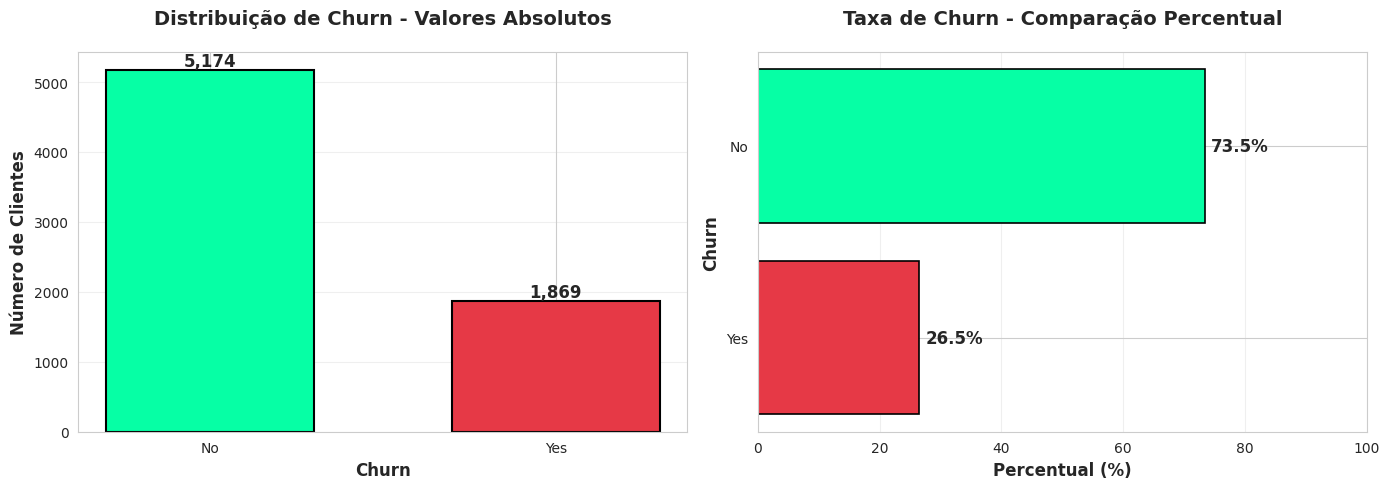


✅ Gráficos gerados seguindo boas práticas de visualização!
   💡 Barras horizontais facilitam comparação de valores


In [72]:
# ====================================================================
# 📉 ANÁLISE DA VARIÁVEL ALVO: CHURN
# ====================================================================
# Variável alvo do projeto: Churn (Yes/No)
# ====================================================================

print("="*60)
print("📉 ANÁLISE DA VARIÁVEL ALVO: CHURN")
print("="*60)

# Contagem absoluta
churn_counts = df_clean['Churn'].value_counts()
print(f"\n📊 Distribuição de Churn (valores absolutos):")
print(churn_counts)

# Percentuais
churn_percent = df_clean['Churn'].value_counts(normalize=True) * 100
print(f"\n📊 Distribuição de Churn (percentuais):")
for valor, pct in churn_percent.items():
    print(f"   {valor}: {pct:.2f}%")

# Taxa de churn
taxa_churn = churn_percent['Yes']
print(f"\n🎯 TAXA DE CHURN: {taxa_churn:.2f}%")

# Impacto financeiro estimado
total_clientes_churn = churn_counts['Yes']
receita_media_mensal = df_clean['MonthlyCharges'].mean()
perda_mensal_estimada = total_clientes_churn * receita_media_mensal

print(f"\n💰 IMPACTO FINANCEIRO:")
print(f"   • Clientes que cancelaram: {total_clientes_churn:,}")
print(f"   • Receita média mensal: ${receita_media_mensal:.2f}")
print(f"   • Perda mensal estimada: ${perda_mensal_estimada:,.2f}")

print("\n" + "="*60)

# ====================================================================
# 📊 VISUALIZAÇÃO: DISTRIBUIÇÃO DE CHURN (BOAS PRÁTICAS)
# ====================================================================

# Criar figura com 2 subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Subplot 1: Gráfico de barras verticais (contagem absoluta)
ax1 = axes[0]
bars = ax1.bar(churn_counts.index, churn_counts.values,
               color=[COLORS['churn_no'], COLORS['churn_yes']],
               edgecolor='black', linewidth=1.5, width=0.6)

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

ax1.set_xlabel('Churn', fontsize=12, fontweight='bold')
ax1.set_ylabel('Número de Clientes', fontsize=12, fontweight='bold')
ax1.set_title('Distribuição de Churn - Valores Absolutos',
              fontsize=14, fontweight='bold', pad=20)
ax1.grid(axis='y', alpha=0.3)

# Subplot 2: Gráfico de barras horizontais (percentual) - MELHOR PRÁTICA
ax2 = axes[1]

# Ordenar para facilitar comparação
churn_percent_sorted = churn_percent.sort_values(ascending=True)
colors_bars = [COLORS['churn_yes'] if idx == 'Yes' else COLORS['churn_no']
               for idx in churn_percent_sorted.index]

bars2 = ax2.barh(churn_percent_sorted.index, churn_percent_sorted.values,
                 color=colors_bars, edgecolor='black', linewidth=1.2)

# Adicionar valores nas barras
for i, (idx, val) in enumerate(churn_percent_sorted.items()):
    ax2.text(val + 1, i, f'{val:.1f}%',
             va='center', fontsize=12, fontweight='bold')

ax2.set_xlabel('Percentual (%)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Churn', fontsize=12, fontweight='bold')  # CORRIGIDO AQUI
ax2.set_title('Taxa de Churn - Comparação Percentual',
              fontsize=14, fontweight='bold', pad=20)
ax2.set_xlim(0, 100)
ax2.grid(axis='x', alpha=0.3)

# Ajustar layout
plt.tight_layout()
plt.show()

print("\n✅ Gráficos gerados seguindo boas práticas de visualização!")
print("   💡 Barras horizontais facilitam comparação de valores")